In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt  
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
(X_train,y_train),(X_test,y_test) =mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(10000,)
(60000,)


The label value is  0


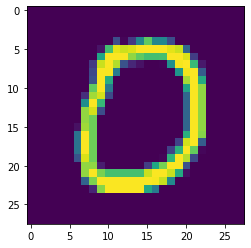

In [3]:
print("The label value is ",y_test[10]) #Value in y_test 
plt.imshow(X_test[10])

The label value is  6


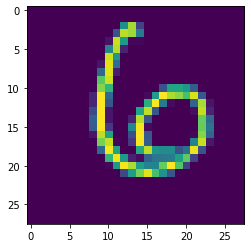

In [4]:
print("The label value is ",y_test[100]) #Value in y_test 
plt.imshow(X_test[100])

The label value is  4


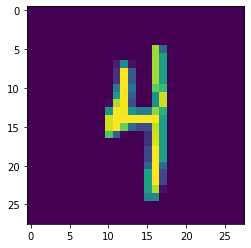

In [5]:
print("The label value is ",y_test[65]) #Value in y_test 
plt.imshow(X_test[65])

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
X_train1 = X_train.reshape(60000, 28, 28, 1).astype('float32')

X_test1 = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [9]:
number_of_classes= 10
y_train1 = np_utils.to_categorical(y_train,number_of_classes)
y_test1 = np_utils.to_categorical(y_test,number_of_classes)

In [10]:
print("After encoding the value",y_test[10] ,"become", y_test1[10])

After encoding the value 0 become [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
print("After encoding the value",y_test[100] ,"become", y_test1[100])

After encoding the value 6 become [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [12]:
print("After encoding the value",y_test[65] ,"become", y_test1[65])

After encoding the value 4 become [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [13]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [15]:
model.fit(X_train1, y_train1, batch_size=32, epochs=10, validation_data=(X_test1,y_test1))

Epoch 1/10
1875/1875 [==============================] - 104s 56ms/step - loss: 0.2189 - accuracy: 0.9520 - val_loss: 0.0759 - val_accuracy: 0.9780
Epoch 2/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0644 - accuracy: 0.9804 - val_loss: 0.0754 - val_accuracy: 0.9794
Epoch 3/10
1875/1875 [==============================] - 106s 56ms/step - loss: 0.0477 - accuracy: 0.9854 - val_loss: 0.1001 - val_accuracy: 0.9710
Epoch 4/10
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0348 - accuracy: 0.9891 - val_loss: 0.0891 - val_accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0295 - accuracy: 0.9915 - val_loss: 0.1021 - val_accuracy: 0.9781
Epoch 6/10
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0272 - accuracy: 0.9918 - val_loss: 0.1133 - val_accuracy: 0.9792
Epoch 7/10
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0181 - accuracy: 0.9943 - val_loss: 0

In [16]:
metrics = model.evaluate(X_test1, y_test1, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.17349037528038025, 0.9779000282287598]


In [17]:
prediction = model.predict(X_test1[:4])
print(prediction)

[[1.01513846e-17 2.70299280e-27 7.14623764e-17 7.80967793e-13
  4.08105190e-34 5.75685997e-24 7.98282504e-32 1.00000000e+00
  1.48886540e-22 5.91704781e-19]
 [5.72078323e-16 3.06126045e-17 1.00000000e+00 3.23127741e-24
  1.01665682e-26 4.26671310e-30 1.22223856e-14 5.38427429e-31
  2.65708068e-19 1.53811783e-33]
 [4.89912971e-12 1.00000000e+00 1.28688882e-08 1.10760336e-17
  5.98572747e-10 1.69324641e-11 1.26497647e-16 1.26635161e-10
  6.65530686e-11 6.07885268e-25]
 [1.00000000e+00 7.89505898e-25 1.09476928e-19 2.48551336e-25
  2.37238242e-24 2.57677931e-16 3.84827680e-23 1.09052224e-26
  2.30348888e-19 4.35066666e-23]]


In [18]:
import numpy as np
print(np.argmax(prediction, axis=1))
print(y_test1[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [19]:
model.save("digit.h5")

In [20]:
from tensorflow.keras.models import load_model
model=load_model("digit.h5")

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 10)                184330    
                                                                 
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Saving in tar

!tar -zcvf digit_recognition.tgz digit.h5

digit.h5


In [23]:
!pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 22.6 MB/s eta 0:00:01


In [24]:
!pip install ibm_watson_machine_learning

In [36]:
from ibm_watson_machine_learning import APIClient

wml_credentials = {
                   "url": "https://us-south.ml.cloud.ibm.com",  # example: "https://eu-gb.ml.cloud.ibm.com"
                   "apikey":"Dt-EkyRgxXR--1mhO8JnCjRGR_AvzoUpJQqbzFnWklU1"
                  }

client = APIClient(wml_credentials)
client

In [37]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/d74a81b5072a47ea932088f3c95b3d8d:ab0faf12-e097-475c-b555-79f9a13b440d::',
      'guid': 'ab0faf12-e097-475c-b555-79f9a13b440d',
      'name': 'Watson Machine Learning-lz',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'digit_deploy',
    'scope': {'bss_account_id': 'd74a81b5072a47ea932088f3c95b3d8d'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': 'dede02b9-9740-4319-881c-f10ec6202dce',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': '9bfe67bd39f14cf5a8666e6188b02143',
        'api_key': '50PMGAm3eSnX_G1VpNG6_XJkwa-veWNCSyyru5ksZsWB',
        'secret_access_key': 'b63dd4e1b1ecefdbdb32478174a66d411cd7a98519c8565b',
        'service_id': 'ServiceId-cf7956f9-5d6e-4fde-9bf9-c2d7d324d3d3'},
       'editor': {'access_key_id': '9e76c7cc5b2c438396b834aaeda87df4',
        'api_key

In [42]:
def guid_space_name(client,digit_deploy):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==digit_deploy)['metadata']['id'])

In [43]:
space_uid = guid_space_name(client,'digit_deploy')
space_uid

'0d542d58-0e93-4b26-a2c6-156ce46c2f36'

In [44]:
client.set.default_space(space_uid)

'SUCCESS'

In [45]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [46]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [47]:
model_details = client.repository.store_model(model='digit_recognition.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"DigitRecognition Model",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [48]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-13T07:37:17.244Z',
  'id': '97a0fe5c-bc5f-463c-b4fd-4c96b875fe52',
  'modified_at': '2022-11-13T07:37:21.297Z',
  'name': 'DigitRecognition Model',
  'owner': 'IBMid-666002J5U4',
  'resource_key': 'b456c228-3dc2-4620-b013-3a1ff46f3a4a',
  'space_id': '0d542d58-0e93-4b26-a2c6-156ce46c2f36'},
 'system': {'warnings': []}}

In [49]:
model_id = client.repository.get_model_id(model_details)
model_id

'97a0fe5c-bc5f-463c-b4fd-4c96b875fe52'

In [50]:
client.repository.download(model_id,'Digit_Recognition_Model.tar.gb')

Successfully saved model content to file: 'Digit_Recognition_Model.tar.gb'


'/home/wsuser/work/Digit_Recognition_Model.tar.gb'